In [4]:
import numpy as np
import pandas as pd
import sys
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import json
import pyaudio

In [2]:
class eye_to_ear:
    def __init__(self, mapname):
        try:
            f = open(mapname, 'r')
            self.mapdata = json.load(f)
        except:
            print("error: wrong mapname")
            sys.exit()
        return
    
    def show_map(self):
        print(self.mapdata)
        return
    
    def is_collision(self, pos):
        return self.in_objects(pos) or self.is_outside(pos)
        
    def in_objects(self, pos):
        obj = self.mapdata['objects']
        for i in obj:
            count = 0
            if (pos[0] > obj[i]['x'][0]) & (pos[0] < obj[i]['x'][1]): count += 1
            if (pos[1] > obj[i]['y'][0]) & (pos[1] < obj[i]['y'][1]): count += 1
            if (pos[2] > obj[i]['z'][0]) & (pos[2] < obj[i]['z'][1]): count += 1
            if count == 3: return True
        return False
    
    def is_outside(self, pos):
        if (pos[0] > self.mapdata['mapsize']['x_max']) | (pos[0] < 0): return True
        if (pos[1] > self.mapdata['mapsize']['y_max']) | (pos[1] < 0): return True
        if (pos[2] > self.mapdata['mapsize']['z_max']) | (pos[2] < 0): return True
        return False
    
    def calc_height(self):
        pos = self.pos.copy()
        obj = self.mapdata['objects']
        while(self.in_objects(pos) == False):
            pos[2] -= 0.01
            if pos[2] < 0:
                return (self.pos[2])
        return self.pos[2] - pos[2]
    
    def set_pos(self, x, y, z):
        pos = np.array([x, y, z], dtype="float64")
        if self.is_collision(pos):
            print("error: wrong position")
            return
        self.pos = pos
        print("now_pos =", self.pos)
        return

    def set_angle(self, deg):
        if deg < 0 or 360 <= deg:
            print("error: angle must be [0,360)")
            return
        print("now_angle =", deg)
        self.deg = deg
        
    def scan(self, deg):
        if deg < 0 or 360 <= deg:
            print("error: angle must be [0,360)")
            return
        print("now_angle =", deg)

        disdata = []
        try:
            pos = self.pos.copy()
            acc = np.array([np.sin(np.pi*deg/180), -1*np.cos(np.pi*deg/180)])
        except ValueError:
            print("error: position or angle is not defined")
            return

        for ele in range(30,120):
            pos_3d = pos.copy()
            acc_3d = acc * np.sin(np.pi*ele/180)
            acc_3d = np.append(acc_3d, -1*np.cos(np.pi*ele/180)) * 0.1
            #print(acc_3d, np.linalg.norm(acc_3d))
            
            dis = 0
            while(self.is_collision(pos_3d) == False):
                dis += 0.1
                pos_3d += acc_3d
            #print(ele, pos_3d)
            disdata.append(dis)
        
        plt.figure()
        plt.plot(range(30,120), disdata)
        plt.show()
        return disdata
        
    def scan90(self, deg):
        scan_map = np.zeros([90,90])
        for d in range(90):
            scandata = self.scan(deg+d)
            for i, data in enumerate(scandata):
                coo_x = int(i * np.cos(np.pi*d/180))
                coo_y = int(i * np.sin(np.pi*d/180))
                if scan_map[coo_x, coo_y] == 0:
                    scan_map[coo_x, coo_y] = data
                else:
                    scan_map[coo_x, coo_y] = (scan_map[coo_x, coo_y] + data) / 2
        return scan_map

In [116]:
#プロット
def pltplot(data):
    print(len(data))
    data = data[0:1000]
    plt.figure()
    x = range(len(data))
    plt.plot(x, data)
    plt.show()

In [123]:
#オーディオ鳴らす
def play_tone(stream, data, frequency=440, length=1, rate=44100):
    chunks = []
    chunks.append(sines(data, rate))
    chunk = np.concatenate(chunks) * 0.1
    #pltplot(chunk)
    stream.write(chunk.astype(np.float32).tostring())

In [124]:
#指定周波数でサイン波を生成する
def sine(frequency, length, rate):
    length = int(length * rate)
    factor = float(frequency) * (np.pi * 2) / rate
    return np.sin(np.arange(length) * factor)

In [125]:
#連続サイン波を生成する
def sines(data, rate):
    freqs = []
    for adata in data:
        tmp = np.ones(1000)
        freqs.append((300+adata*10) * tmp)
    freqs = np.concatenate(freqs)
    phazes_diff = 2 * np.pi * freqs / rate
    phazes = np.cumsum(phazes_diff)
    return np.sin(phazes)

now_pos = [ 5. 50.  2.]
now_angle = 90


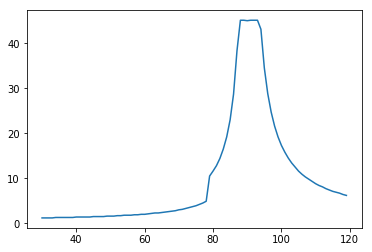

In [126]:
ete = eye_to_ear("station_platform.json")
ete.set_pos(5,50,2)
data = ete.scan(90)
p = pyaudio.PyAudio()
stream = p.open(format=pyaudio.paFloat32, channels=1, rate=44100, output=1)
play_tone(stream, data)
stream.close()
p.terminate()

now_pos = [ 5. 50.  2.]
now_angle = 90


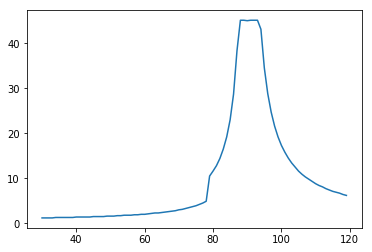

now_angle = 91


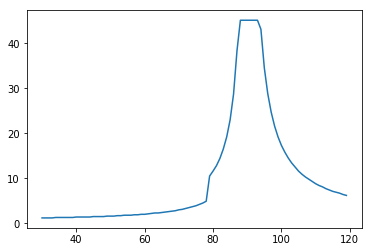

now_angle = 92


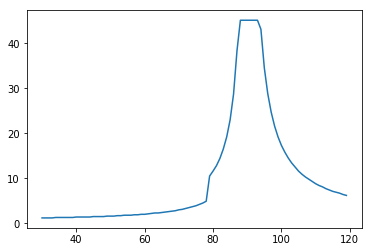

now_angle = 93


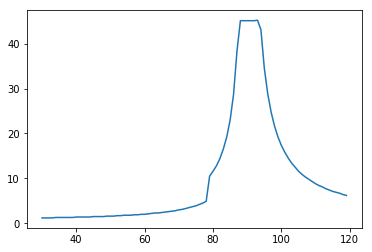

now_angle = 94


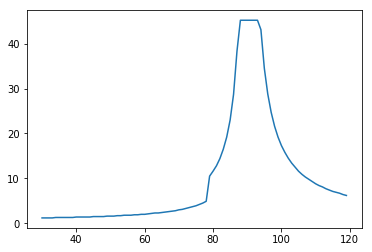

now_angle = 95


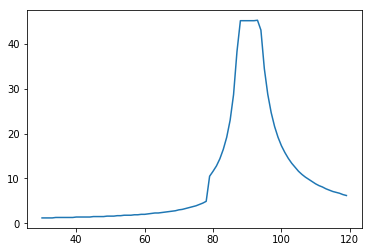

now_angle = 96


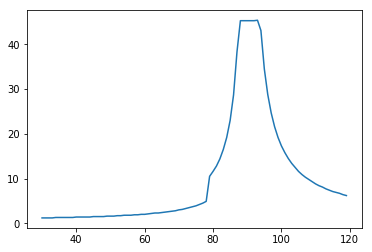

now_angle = 97


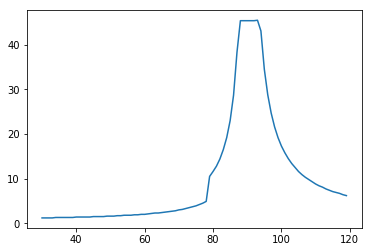

now_angle = 98


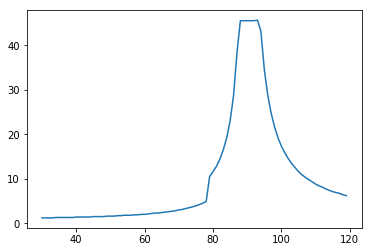

now_angle = 99


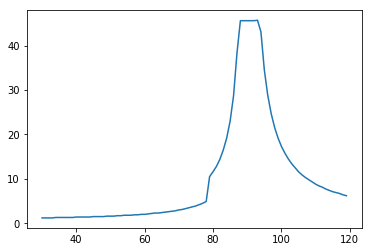

now_angle = 100


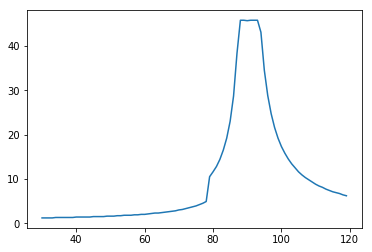

now_angle = 101


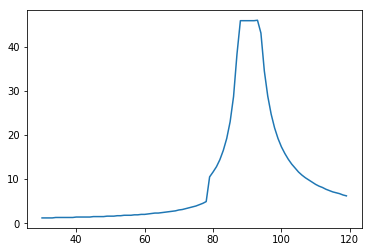

now_angle = 102


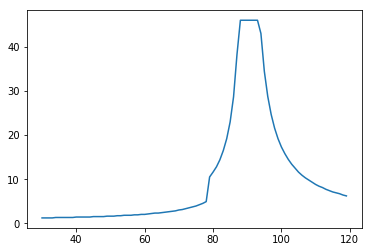

now_angle = 103


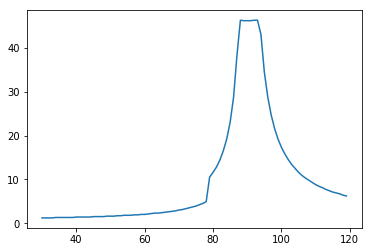

now_angle = 104


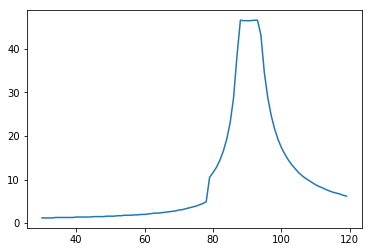

now_angle = 105


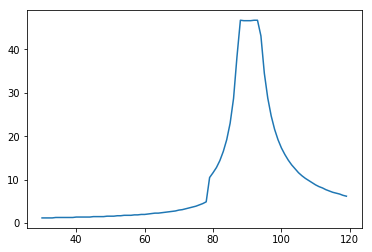

now_angle = 106


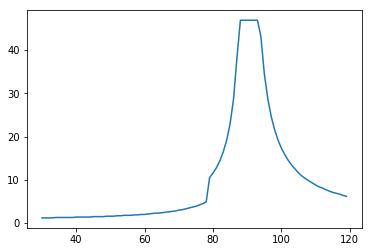

now_angle = 107


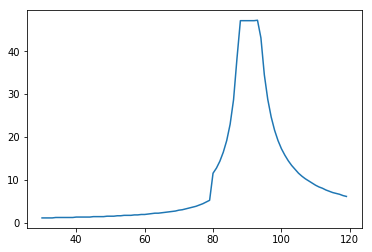

now_angle = 108


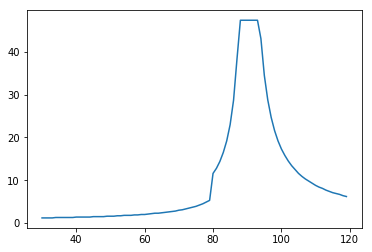

now_angle = 109


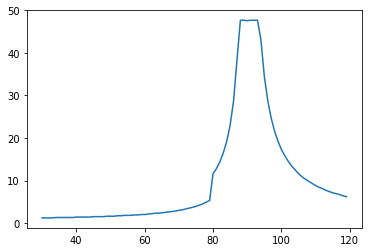

now_angle = 110


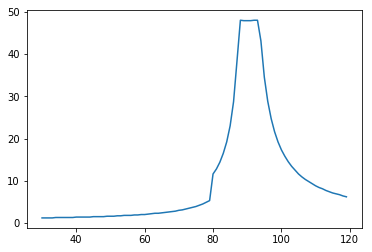

now_angle = 111


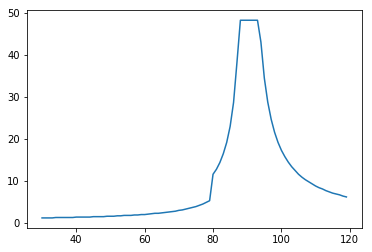

now_angle = 112


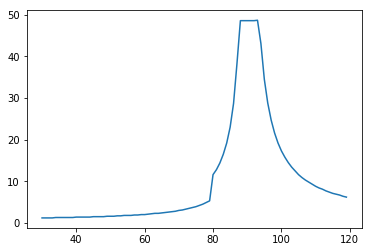

now_angle = 113


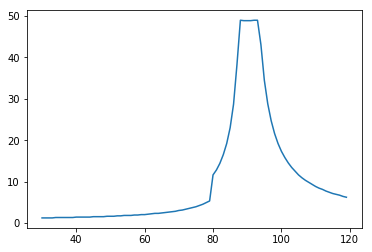

now_angle = 114


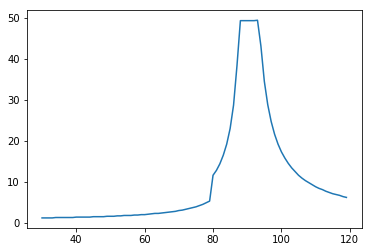

now_angle = 115


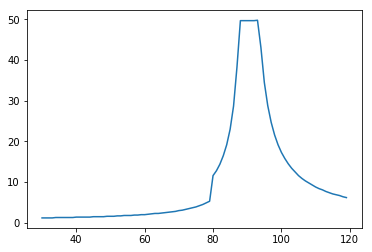

now_angle = 116


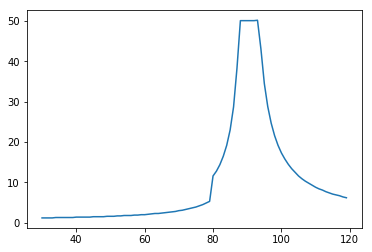

now_angle = 117


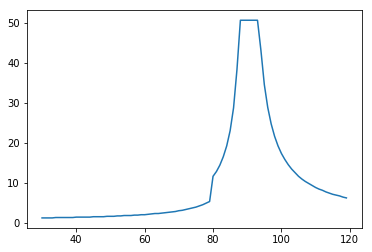

now_angle = 118


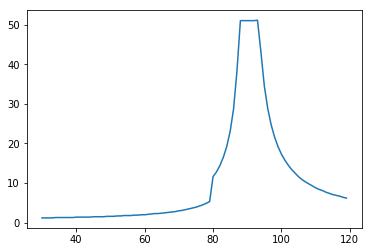

now_angle = 119


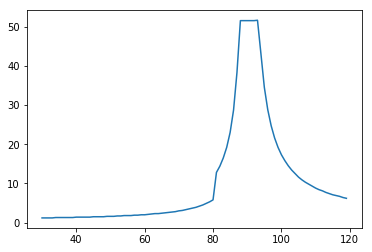

now_angle = 120


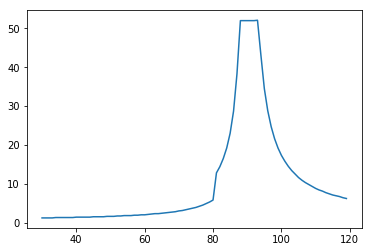

now_angle = 121


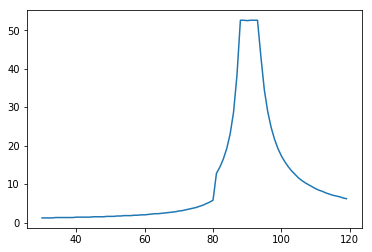

now_angle = 122


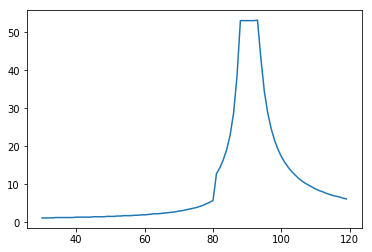

now_angle = 123


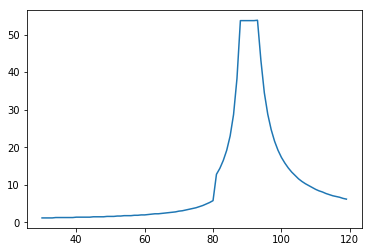

now_angle = 124


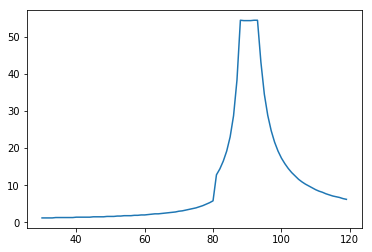

now_angle = 125


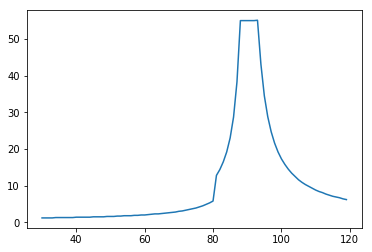

now_angle = 126


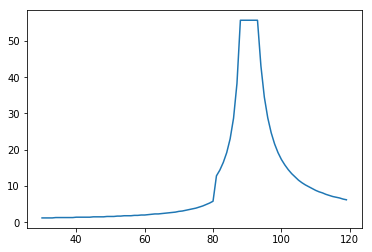

now_angle = 127


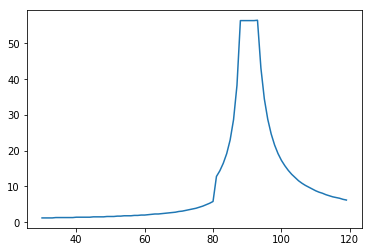

now_angle = 128


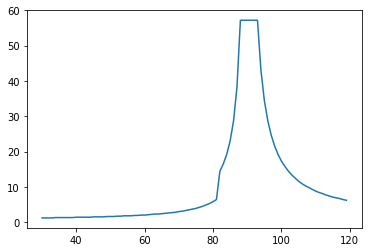

now_angle = 129


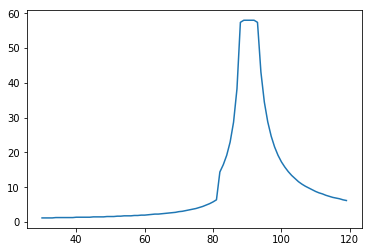

now_angle = 130


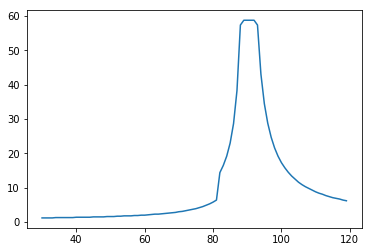

now_angle = 131


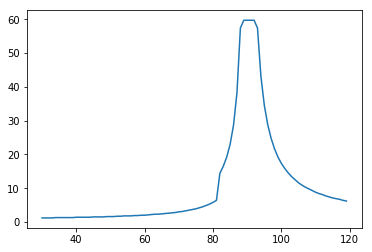

now_angle = 132


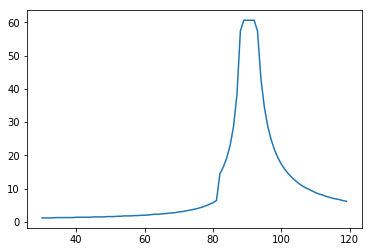

now_angle = 133


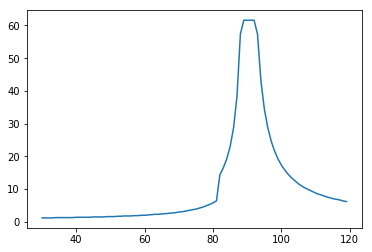

now_angle = 134


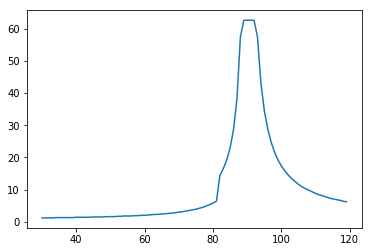

now_angle = 135


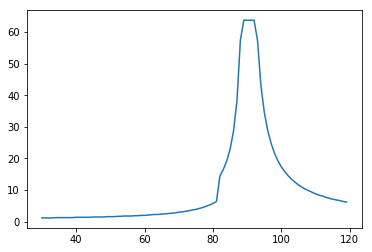

now_angle = 136


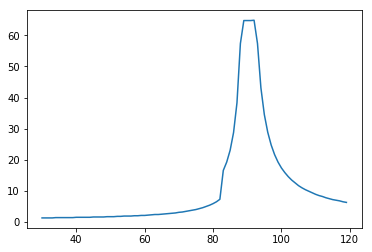

now_angle = 137


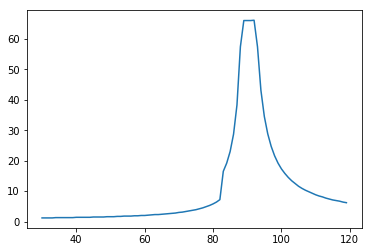

now_angle = 138


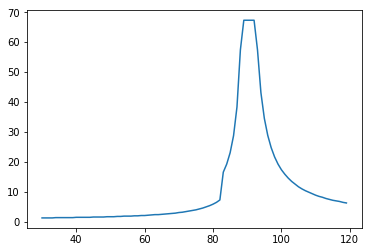

now_angle = 139


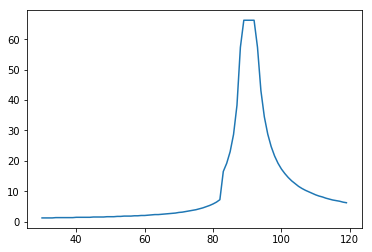

now_angle = 140


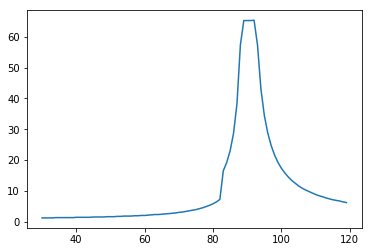

now_angle = 141


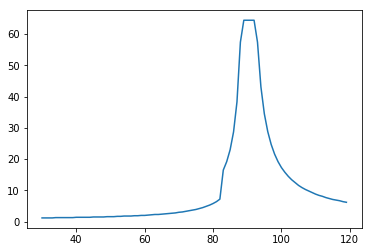

now_angle = 142


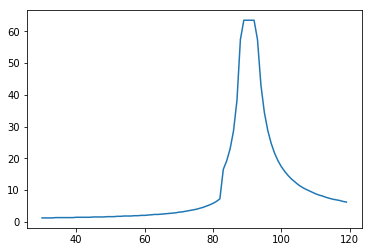

now_angle = 143


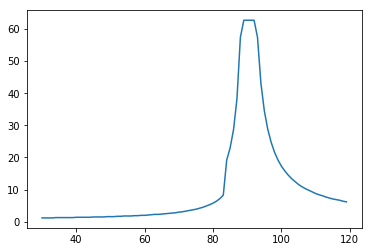

now_angle = 144


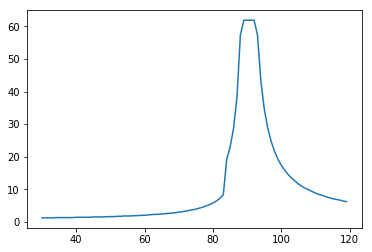

now_angle = 145


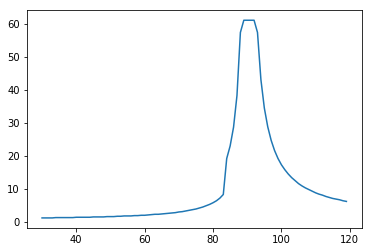

now_angle = 146


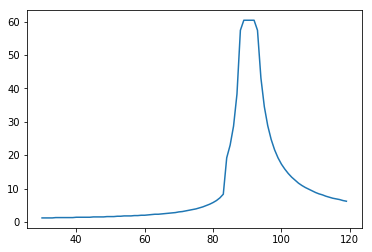

now_angle = 147


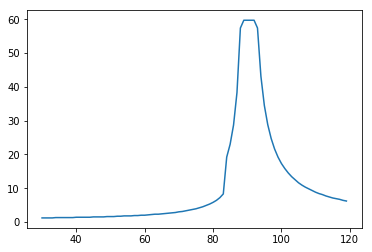

now_angle = 148


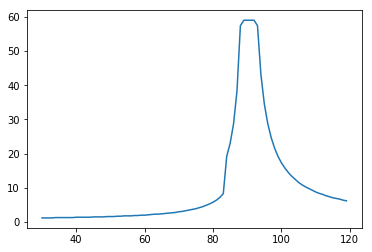

now_angle = 149


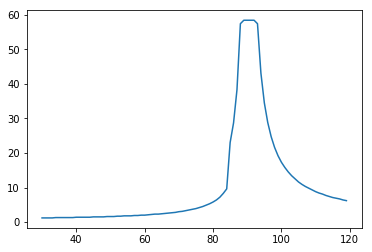

now_angle = 150


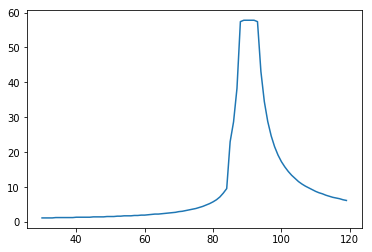

now_angle = 151


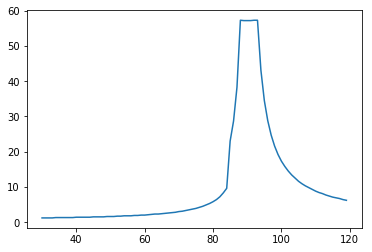

now_angle = 152


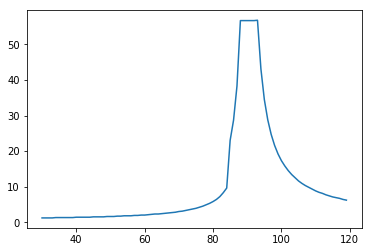

now_angle = 153


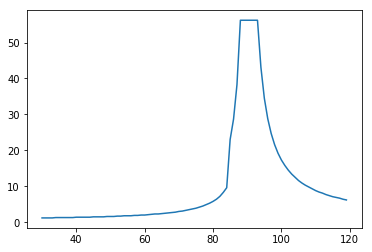

now_angle = 154


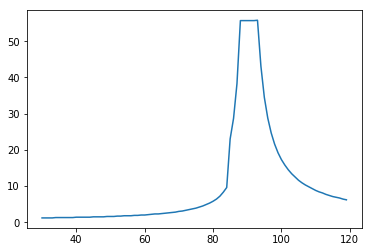

now_angle = 155


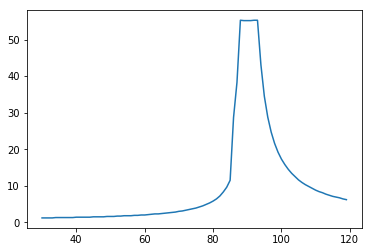

now_angle = 156


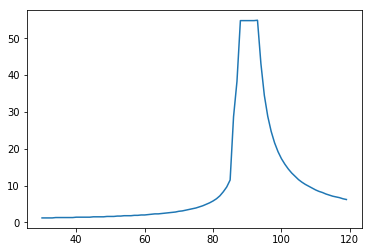

now_angle = 157


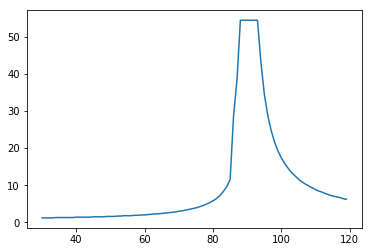

now_angle = 158


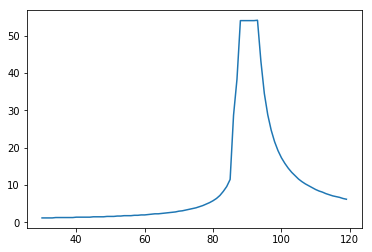

now_angle = 159


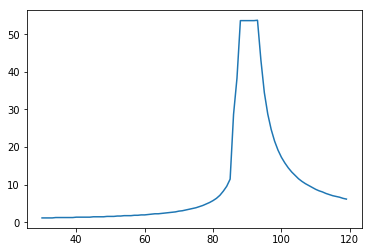

now_angle = 160


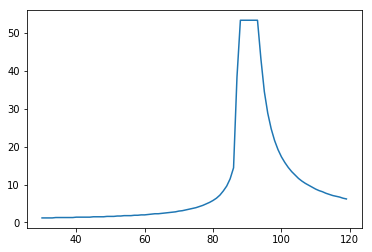

now_angle = 161


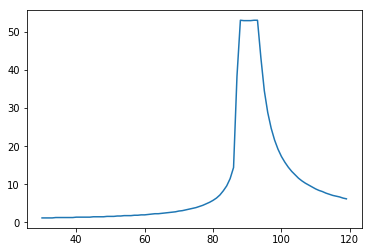

now_angle = 162


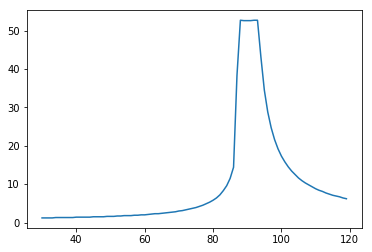

now_angle = 163


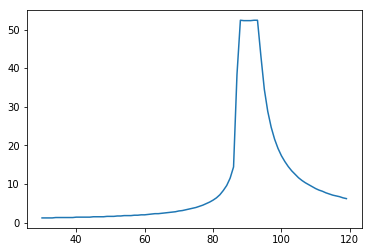

now_angle = 164


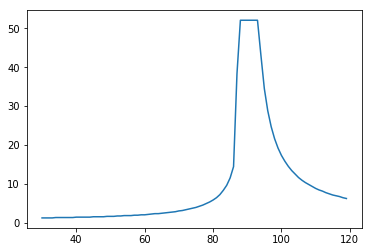

now_angle = 165


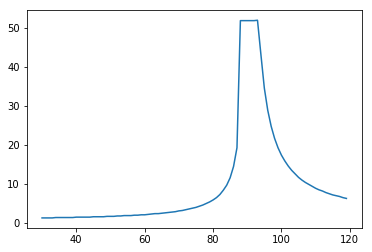

now_angle = 166


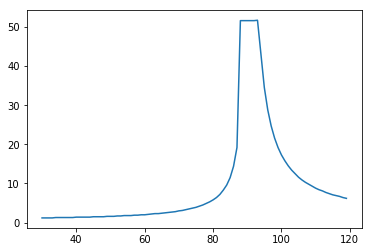

now_angle = 167


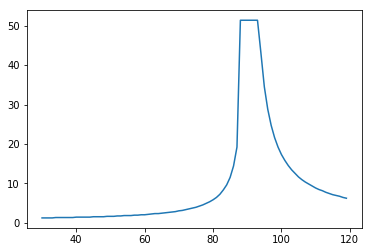

now_angle = 168


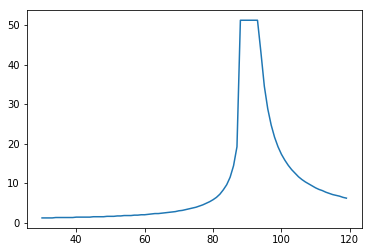

now_angle = 169


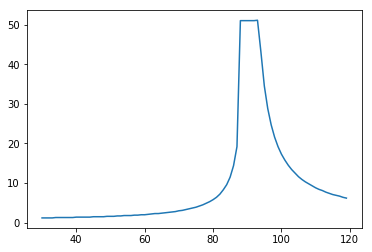

now_angle = 170


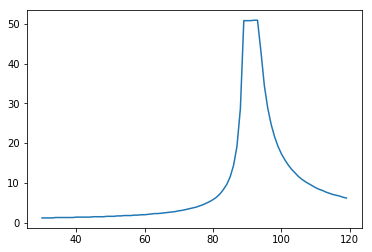

now_angle = 171


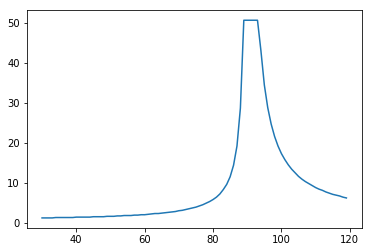

now_angle = 172


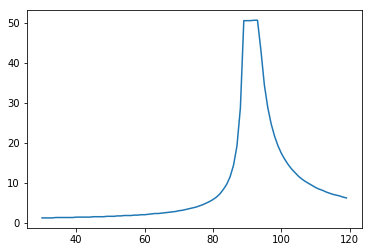

now_angle = 173


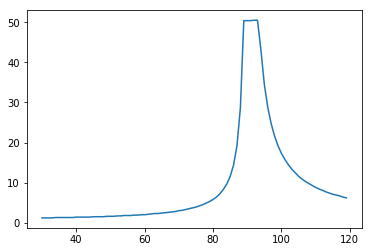

now_angle = 174


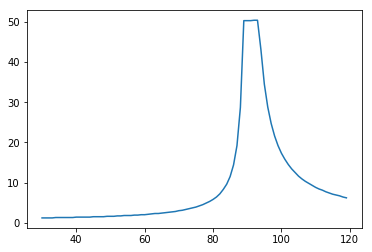

now_angle = 175


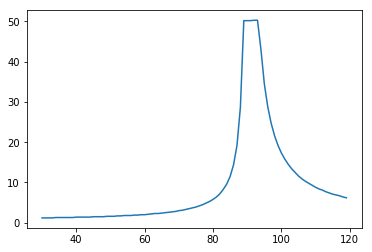

now_angle = 176


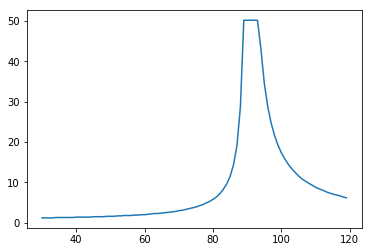

now_angle = 177


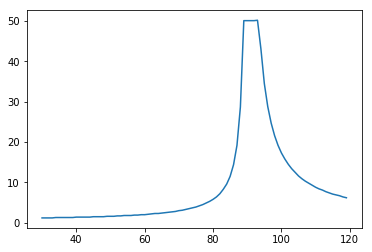

now_angle = 178


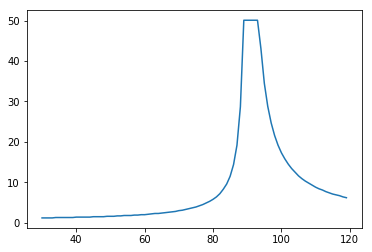

now_angle = 179


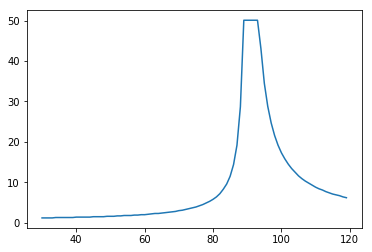

In [3]:
ete = eye_to_ear("station_platform.json")
ete.set_pos(5,50,2)
ete.calc_height()
scandata = ete.scan90(90)

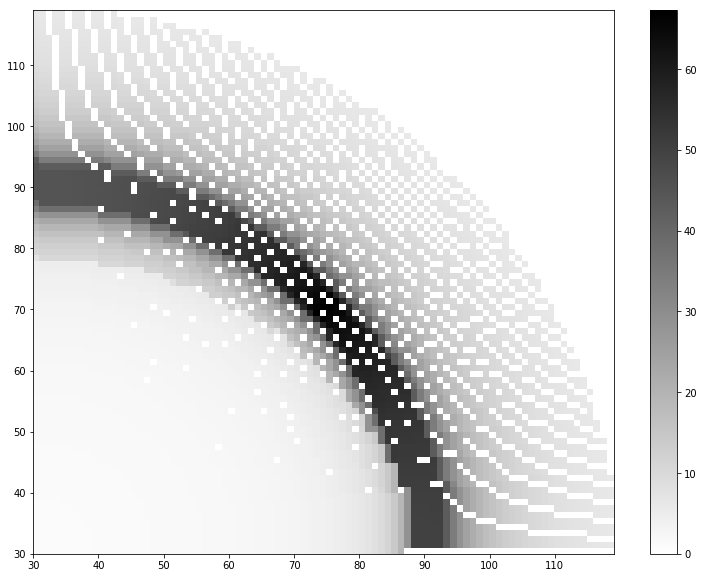

In [4]:
xx, yy = np.meshgrid(range(30,120), range(30,120))
plt.figure(figsize=[13,10])
plt.pcolormesh(xx, yy, scandata, cmap='binary')
pp=plt.colorbar (orientation="vertical")
plt.show()

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


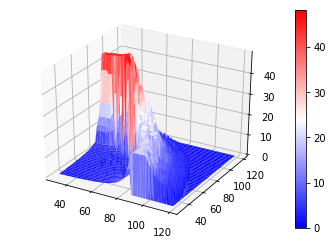

In [91]:
fig = plt.figure()
xx, yy = np.meshgrid(range(30,120), range(30,120))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(xx, yy, scandata, cmap='bwr', linewidth=1)
fig.colorbar(surf)
fig.show()

In [45]:
ete.show_map()

{'mapsize': {'x_max': 50, 'y_max': 100, 'z_max': 5}, 'objects': {'platform': {'x': [0, 10], 'y': [0, 100], 'z': [0, 1]}}}
